In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species')

In [3]:
path.ls()

[PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/models'),
 PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/valid'),
 PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/monkey_labels.txt'),
 PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/tmp'),
 PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/train')]

In [96]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=256).normalize(imagenet_stats)

In [132]:
x = Counter([str(x) for x in data.train_ds.y])

<function Counter.items>

In [27]:
pd.Series([str(x) for x in data.train_ds.y]).value_counts(); pd.Series([str(x) for x in data.valid_ds.y]).value_counts()

n3_japanese_macaque             122
n7_common_squirrel_monkey       114
n5_white_headed_capuchin        113
n1_patas_monkey                 111
n2_bald_uakari                  110
n8_black_headed_night_monkey    106
n6_silvery_marmoset             106
n0_mantled_howler               105
n4_pygmy_marmoset               105
n9_nilgiri_langur               105
dtype: int64

n3_japanese_macaque             30
n1_patas_monkey                 28
n5_white_headed_capuchin        28
n7_common_squirrel_monkey       28
n8_black_headed_night_monkey    27
n2_bald_uakari                  27
n4_pygmy_marmoset               26
n9_nilgiri_langur               26
n6_silvery_marmoset             26
n0_mantled_howler               26
dtype: int64

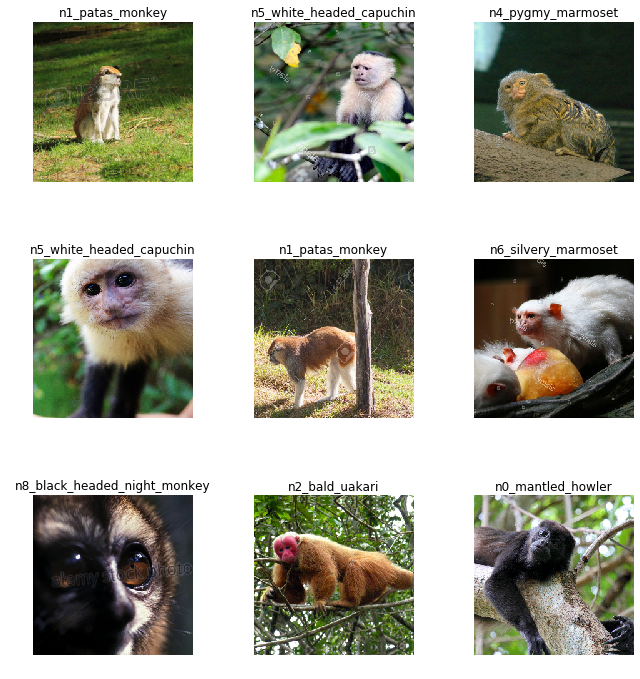

In [31]:
data.show_batch(rows=3)

In [32]:
learner = create_cnn(data, models.resnet18, metrics=accuracy)

In [33]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


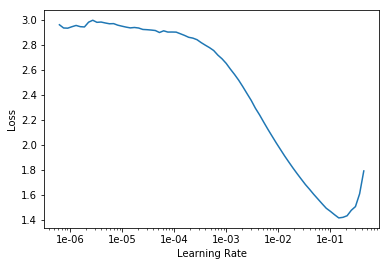

In [34]:
learner.recorder.plot()

In [35]:
learner.fit_one_cycle(2, 5*1e-3)

Total time: 00:31
epoch  train_loss  valid_loss  accuracy
1      0.952406    0.063293    0.985294  (00:16)
2      0.441537    0.047325    0.988971  (00:14)



In [36]:
os.getcwd()

learner.unfreeze()

'/mnt/datadrive1/h216520/fastai_v3/course-v3/nbs/dl1/rb1992/week2'

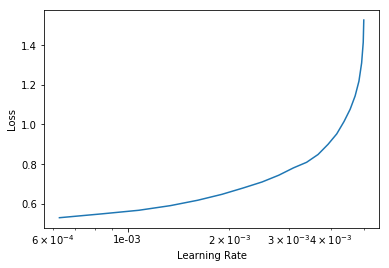

In [42]:
learner.recorder.plot()

In [44]:
learner.fit_one_cycle(2, 5*1e-5)

Total time: 00:30
epoch  train_loss  valid_loss  accuracy
1      0.054085    0.030293    0.992647  (00:14)
2      0.049368    0.026896    0.996324  (00:15)



In [38]:
learner.model_dir

'models'

In [45]:
learner.save('monkey_res18',return_path=True)

PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/models/monkey_res18.pth')

## For inference

In [50]:
path

PosixPath('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species')

In [85]:
set([ str(x) for x in data.train_ds.y])

{'n0_mantled_howler',
 'n1_patas_monkey',
 'n2_bald_uakari',
 'n3_japanese_macaque',
 'n4_pygmy_marmoset',
 'n5_white_headed_capuchin',
 'n6_silvery_marmoset',
 'n7_common_squirrel_monkey',
 'n8_black_headed_night_monkey',
 'n9_nilgiri_langur'}

In [87]:
dummpath = Path('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/tmp')
cat_fnames = [f'/{c}_1.jpg'    for c in ['n0_mantled_howler','n1_patas_monkey','n2_bald_uakari','n3_japanese_macaque',
                         'n4_pygmy_marmoset','n5_white_headed_capuchin','n6_silvery_marmoset',
                         'n7_common_squirrel_monkey','n8_black_headed_night_monkey','n9_nilgiri_langur']]
cat_fnames

['/n0_mantled_howler_1.jpg',
 '/n1_patas_monkey_1.jpg',
 '/n2_bald_uakari_1.jpg',
 '/n3_japanese_macaque_1.jpg',
 '/n4_pygmy_marmoset_1.jpg',
 '/n5_white_headed_capuchin_1.jpg',
 '/n6_silvery_marmoset_1.jpg',
 '/n7_common_squirrel_monkey_1.jpg',
 '/n8_black_headed_night_monkey_1.jpg',
 '/n9_nilgiri_langur_1.jpg']

In [93]:
empty_data = ImageDataBunch.from_name_re(dummpath, cat_fnames, r"/([^/]+)_\d+.jpg$").normalize(imagenet_stats)
learn = create_cnn(empty_data, models.resnet18)
learn.load(Path('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/models/monkey_res18'), device='cpu')

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.8.weight: copying a param of torch.Size([10, 512]) from checkpoint, where the shape is torch.Size([8, 512]) in current model.
	size mismatch for 1.8.bias: copying a param of torch.Size([10]) from checkpoint, where the shape is torch.Size([8]) in current model.

In [65]:
x=open_image('/mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species/train/n8_black_headed_night_monkey/n8122.jpg')
learn.predict(x)

('n8_black_headed_night_monkey',
 tensor(6),
 tensor([0.0017, 0.0105, 0.0052, 0.0024, 0.0255, 0.0045, 0.9351, 0.0017, 0.0056,
         0.0078]))

In [67]:
learn.data

ImageDataBunch;
Train: LabelList
y: CategoryList (1097 items)
[Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin]...
Path: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species
x: ImageItemList (1097 items)
[Image (3, 519, 346), Image (3, 427, 640), Image (3, 480, 852), Image (3, 599, 450), Image (3, 425, 597)]...
Path: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species;
Valid: LabelList
y: CategoryList (272 items)
[Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin]...
Path: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species
x: ImageItemList (272 items)
[Image (3, 3008, 2000), Image (3, 531, 640), Image (3, 453, 800), Image (3, 900, 889), Image (3, 370, 470)]...
Path: /mnt/datadrive1/h216520/Ima

In [100]:
learner.__dict__

{'data': ImageDataBunch;
 Train: LabelList
 y: CategoryList (1097 items)
 [Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin]...
 Path: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species
 x: ImageItemList (1097 items)
 [Image (3, 519, 346), Image (3, 427, 640), Image (3, 480, 852), Image (3, 599, 450), Image (3, 425, 597)]...
 Path: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species;
 Valid: LabelList
 y: CategoryList (272 items)
 [Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin]...
 Path: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species
 x: ImageItemList (272 items)
 [Image (3, 3008, 2000), Image (3, 531, 640), Image (3, 453, 800), Image (3, 900, 889), Image (3, 370, 470)]...
 Path: /mnt

In [112]:
repr(data)

'ImageDataBunch;\nTrain: LabelList\ny: CategoryList (1097 items)\n[Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin]...\nPath: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species\nx: ImageItemList (1097 items)\n[Image (3, 519, 346), Image (3, 427, 640), Image (3, 480, 852), Image (3, 599, 450), Image (3, 425, 597)]...\nPath: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species;\nValid: LabelList\ny: CategoryList (272 items)\n[Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin, Category n5_white_headed_capuchin]...\nPath: /mnt/datadrive1/h216520/Image_Classification/Data/10-monkey-species\nx: ImageItemList (272 items)\n[Image (3, 3008, 2000), Image (3, 531, 640), Image (3, 453, 800), Image (3, 900, 889), Image (3, 370, 470)]...\nPath: /mnt/datadri